soma_valores             int64
Geração Líquida (GWh)    int64
Geração Bruta (GWh)      int64
disponibilidade          int64
despacho                 int64
dtype: object


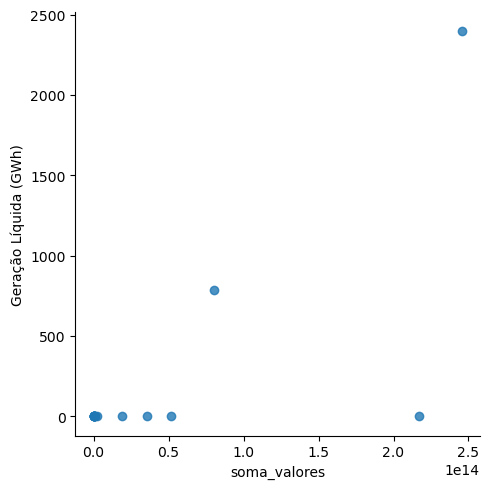

diff_corr


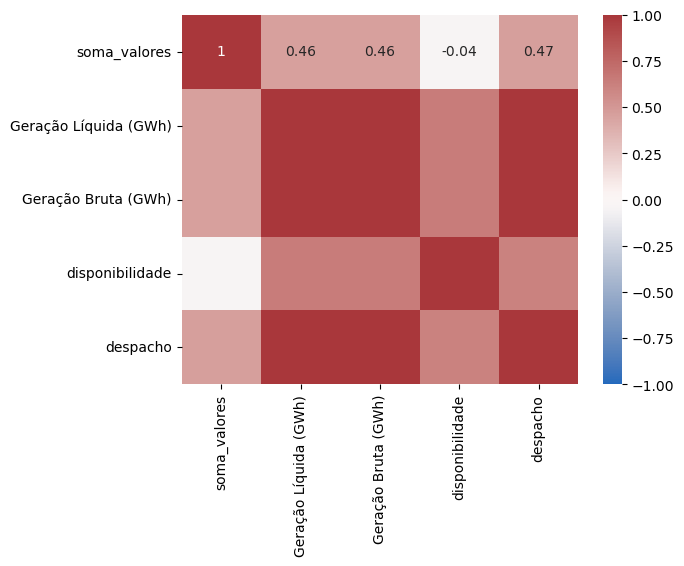

In [143]:
#Correlation Matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%%matplotlib inline

#Primeiro vamos ler o arquivo csv e transformá-lo em um dataframe pandas. 
#Depois selecionamos usinas específicas na coluna 'nom_usina', e por fim, selecionamos só as colunas que queremos

df = pd.read_csv('GERACAO_USINA_16-22_CEG_TRIMESTRAL_NOM-USINA_SOMA_ENEVAb.csv')
df = df.loc[df['nom_usina'] == ('Porto de Sergipe I')] #mudar a usina cada rodada. Porto do Itaqui, Pecém II, Parnaíba IV, Parnaíba V, Jaquatirica II, Porto de Sergipe, Fortaleza.
df = df.drop(['year', 'QUARTER', 'nom_usina', 'Disponibilidade (%)', 'Despacho (%)', 'Geração para ACR (%)', 'Geração para ACL (%)', 'Receita Variável Líquida (R$/MWh)1', 'CVU (R$/MWh)2'], axis=1)
print(df.dtypes)
#df['din_instante'] = pd.to_datetime(df['din_instante') #.dtypes (Transformar o tipo de objeto para datetime)

#print(df.tail(150))

#Vamos plotar um gráfico scatter entre as várias analisadas
sns.lmplot(x='soma_valores', y='Geração Líquida (GWh)', fit_reg=False, data=df);
plt.savefig('scatter_plot_corr_sergipe.png')
plt.show()

#Plotar heatmap matrix correlation
matrix = df.corr() #verificar a correlação das variáveis
matrix_diff = df.diff().corr() #para verificar correlação sazonal
print('diff_corr' % matrix)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.savefig('heatmap_corr_matrix_sergipe.png')
plt.show()
sns.heatmap(matrix_diff, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.savefig('heatmap_diff_corr_matrix_sergipe.png')
plt.show()

In [142]:
#Cálculo da matriz de covariância e o método de pearson para aferir a correlação entre as variáveis 
from numpy import cov
covariance = cov(df['Geração Líquida (GWh)'], df['soma_valores'])
print(covariance)
corr, _ = pearsonr(df['Geração Líquida (GWh)'], df['soma_valores'])
print('Pearsons correlation: %.3f' % corr)

[[3.81295583e+05 3.47486702e+16]
 [3.47486702e+16 6.09551366e+27]]
Pearsons correlation: 0.721
